## Data exporation and cleaning

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data**

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [5]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

**Dropping unnecessary columns**

In [6]:
df.drop(['county','url', 'region_url','region',], axis =1, inplace = True)
df.drop(['lat','long'], axis =1, inplace = True)
df.drop(['image_url'], axis =1, inplace = True)
df.drop(['vin'], axis =1, inplace = True)

Why cylinders is an object type?

In [11]:
df.cylinders.unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       '12 cylinders', '5 cylinders', '3 cylinders', 'other'],
      dtype=object)

In [13]:
df.cylinders.value_counts()

6 cylinders     70130
4 cylinders     69542
8 cylinders     54091
5 cylinders      1594
10 cylinders      884
other             851
3 cylinders       406
12 cylinders      181
Name: cylinders, dtype: int64

In [14]:
df['cylinders'] = df.cylinders.apply(lambda x: str(x).replace('cylinders','').strip())

In [15]:
df.cylinders.value_counts()

nan      226178
6         70130
4         69542
8         54091
5          1594
10          884
other       851
3           406
12          181
Name: cylinders, dtype: int64

**Making it numerical**

In [16]:
df.cylinders = pd.to_numeric(df.cylinders, errors = 'coerce')

In [17]:
df.cylinders.dtype

dtype('float64')

**Looking other curious columns**

In [18]:
df.type.value_counts()

sedan          64842
SUV            62106
truck          26967
pickup         24276
coupe          12931
other          12866
hatchback       9574
wagon           8332
van             7287
convertible     5854
mini-van        5213
offroad          530
bus              379
Name: type, dtype: int64

<AxesSubplot:>

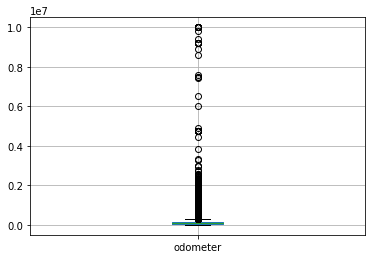

In [20]:
df.boxplot('odometer')

In [21]:
df.odometer.describe()

count    2.705850e+05
mean     9.942578e+04
std      1.204833e+05
min      0.000000e+00
25%      4.432400e+04
50%      9.174900e+04
75%      1.372370e+05
max      1.000000e+07
Name: odometer, dtype: float64

We wanna predict the price of the vehicles, so maybe the vehicles type "truck" will spoil our model with their high odometer, so lets look graphically

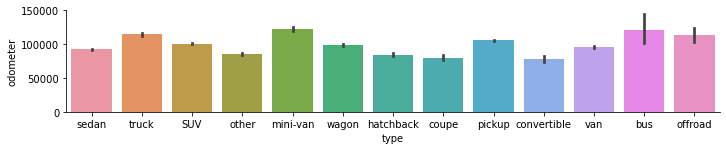

In [26]:
sns.catplot(x='type', y='odometer', kind="bar", data=df, aspect = 5, height=2)

Aparently none type of vehicle has more odometer than others

**Looking into price column**

In [27]:
df.price.describe()

count    4.238570e+05
mean     5.779437e+04
std      1.002581e+07
min      0.000000e+00
25%      4.499000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

<AxesSubplot:>

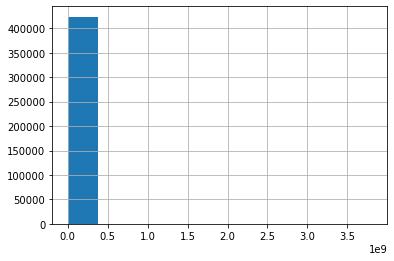

In [28]:
df.price.hist()

<AxesSubplot:>

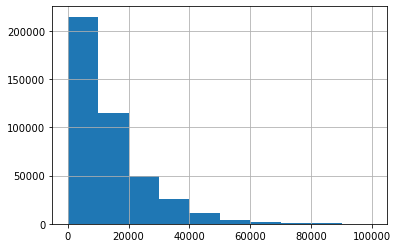

In [29]:
df["price"][df["price"]<100000].hist()

In [30]:
df[df["price"]>60000]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
248,7195013022,66995,2018.0,ford,f-350 lifted crew cab lariat sb 4x4 6.7 powers...,NaN,8.0,other,37865.0,clean,automatic,4wd,NaN,pickup,grey,🚗2018 Ford F-350 LIFTED CREW CAB LARIAT SB 4X4...,nm
257,7187140508,95000,2008.0,NaN,FREIGHTLINER M2,NaN,NaN,diesel,79000.0,clean,automatic,4wd,NaN,truck,NaN,2008 Freightliner M106 M2 4x4 Offered by: ...,mn
260,7187127580,150000,2017.0,NaN,KENWORTH T3 SERIES,NaN,NaN,gas,6086.0,clean,NaN,fwd,NaN,truck,NaN,2017 Kenworth VIP Transporter Offered by: ...,mn
394,7186396645,64988,2020.0,chevrolet,silverado 2500hd,NaN,NaN,gas,14834.0,clean,automatic,4wd,NaN,NaN,red,Pleasureland Truck Center address: 25064 St...,mn
439,7185971884,95000,2008.0,NaN,FREIGHTLINER M2,NaN,NaN,diesel,79000.0,clean,automatic,4wd,NaN,truck,NaN,2008 Freightliner M106 M2 4x4 Offered by: ...,mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422245,7194095310,62995,2017.0,mercedes-benz,sl,NaN,NaN,gas,15629.0,clean,automatic,NaN,NaN,NaN,NaN,2017 Mercedes-Benz SL CALL Automotive Avenues:...,nj
422344,7193975158,74995,2017.0,mercedes-benz,s-class,NaN,NaN,gas,12420.0,clean,automatic,NaN,NaN,NaN,NaN,2017 Mercedes-Benz S-Class CALL Automotive Ave...,nj
423110,7183900619,70000,2018.0,NaN,2018 mustang gt,like new,8.0,gas,NaN,clean,manual,rwd,compact,coupe,black,"Newly purchased 2018 Roush JackHammer, full 3 ...",mi
423412,7185350063,65900,2009.0,NaN,International 4300,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,*** SHIPPING AVAILABLE *** Altec A40P Cable P...,mn


Only 4k rows with 60000+. So we are gonna drop it.

In [31]:
df_clean = df[df["price"]<60000]

<AxesSubplot:>

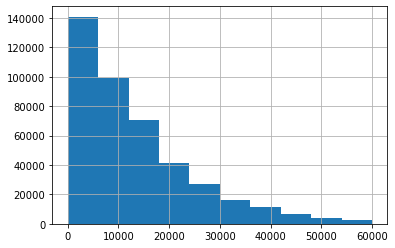

In [32]:
df_clean.price.hist()

In [33]:
df_clean.price.describe()

count    419440.000000
mean      13147.634987
std       11799.660769
min           0.000000
25%        4450.000000
50%        9995.000000
75%       18800.000000
max       59999.000000
Name: price, dtype: float64

Aparently there are some vehicles with price 0. We are gonna drop it and work with price > 1000 USD

In [34]:
df_clean = df_clean[df_clean['price']>=1000]

<AxesSubplot:>

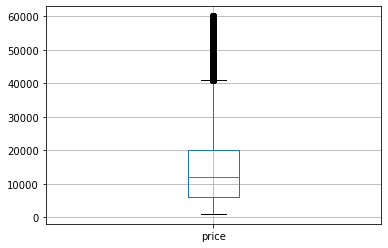

In [35]:
df_clean.boxplot('price')

**Lets look into the year of the data**

<AxesSubplot:>

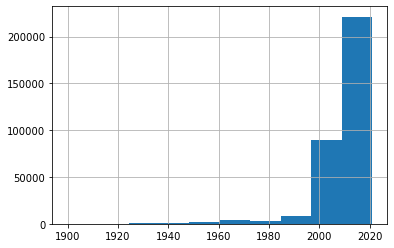

In [36]:
df.year.hist()

<AxesSubplot:>

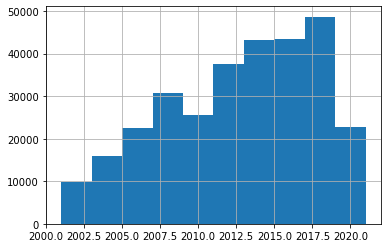

In [37]:
df["year"][df["year"]>2000].hist()

In [38]:
df[df["year"]<2000]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
19,7184663608,1500,1994.0,buick,century,fair,4.0,gas,128000.0,clean,automatic,fwd,mid-size,sedan,brown,1994 Buick Century running and its twin for aw...,mn
20,7184626883,6000,1997.0,ford,f-800,good,NaN,gas,152415.0,clean,automatic,rwd,full-size,other,brown,I have for sale a 1997 Ford F-800 Dump Truck. ...,mn
26,7195085488,5000,1980.0,chevrolet,camaro,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,"1980 camaro, runs amazing Interior needs work ...",nm
50,7184080602,27000,1964.0,dodge,polara,like new,8.0,gas,36000.0,clean,automatic,rwd,mid-size,coupe,red,"1964 Dodge Polara. $27,000. All original survi...",mn
53,7183985811,500,1998.0,honda,civic,good,4.0,gas,242613.0,clean,automatic,NaN,compact,NaN,red,Engine runs good but started to overheat for m...,mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423840,7185260804,30000,1970.0,ford,ranchero gt cobra,excellent,NaN,gas,53325.0,clean,automatic,rwd,full-size,other,custom,Used 1970 Ford Ranchero GT Cobra Classic Muscl...,mn
423841,7185259670,15000,1962.0,NaN,Studebaker GT Hawk Torisimo,excellent,NaN,gas,2696.0,clean,automatic,rwd,full-size,coupe,black,Used 1962 Studebaker GT Hawk Grand Torisimo Cl...,mn
423844,7185155996,6000,1994.0,ford,f-700,good,NaN,diesel,37000.0,clean,manual,rwd,full-size,van,white,I have For Sale a 1994 Ford F-700 Box Truck. ...,mn
423854,7184805809,700,1994.0,ford,f-150,fair,6.0,gas,212000.0,clean,manual,rwd,NaN,NaN,green,I'm selling this beautiful old pickup that I j...,mn


24k of entries below the 00's. Were gonna drop it since we want to work with vehicles from 2000 onwards

In [39]:
df_clean = df_clean[df_clean["year"]>=2000]

In [40]:
df_clean.year.describe()

count    264983.000000
mean       2011.726405
std           5.053896
min        2000.000000
25%        2008.000000
50%        2012.000000
75%        2016.000000
max        2021.000000
Name: year, dtype: float64

In [44]:
df[df["year"]==2021]

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
6202,7194162420,22680,2021.0,hyundai,kona sel automatic,NaN,NaN,gas,8.0,clean,automatic,fwd,NaN,SUV,white,2021 Hyundai Kona SEL Tamiami Hyundai800-499-...,fl
6420,7193568670,975,2021.0,NaN,isuzu NPR HD,new,8.0,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,"2021 Isuzu NPR Hd, 16ft pro- scaper . Automati...",fl
7035,7191841338,37996,2021.0,toyota,venza le hybrid,new,6.0,hybrid,NaN,clean,automatic,4wd,mid-size,SUV,red,This all New Toyota Venza LE Hybrid Hybrid Edi...,tx
8445,7180860200,45000,2021.0,hyundai,palisade limited,new,6.0,gas,645.0,clean,automatic,fwd,NaN,SUV,NaN,Bought this vehicle less than a week ago. Has...,tn
9180,7194548582,0,2021.0,kia,telluride sx,like new,6.0,gas,NaN,clean,automatic,fwd,full-size,SUV,black,Fully loaded Telluride SX wont last long .Thi...,fl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407442,7184361544,0,2021.0,NaN,any and all,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,The Thomas Hirchak Company Auto Auction in Wil...,vt
407743,7183496111,0,2021.0,NaN,any and all,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,The Thomas Hirchak Public Auto Auction is look...,vt
408133,7192398091,25469,2021.0,chevrolet,trailblazer,NaN,NaN,gas,9.0,clean,automatic,fwd,NaN,NaN,NaN,➔ Want to see more pictures?Paste this link to...,in
414309,7192395910,25469,2021.0,chevrolet,trailblazer,NaN,NaN,gas,9.0,clean,automatic,fwd,NaN,NaN,NaN,➔ Want to see more pictures?Paste this link to...,ia


Same with the 2021 vehicles.

In [45]:
df_clean = df_clean[df_clean["year"]<2021]

<AxesSubplot:>

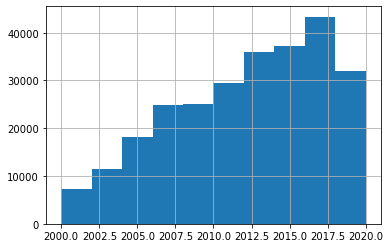

In [46]:
df_clean.year.hist()

<AxesSubplot:>

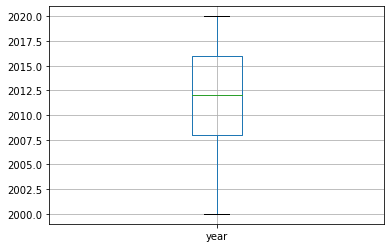

In [47]:
df_clean.boxplot('year')

**Other columns**

In [48]:
df_clean.transmission.unique()

array(['automatic', 'manual', 'other', nan], dtype=object)

In [49]:
df_clean[df_clean["transmission"]=='other']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
46,7195072023,19995,2005.0,ford,super duty f-350 drw,excellent,8.0,diesel,167828.0,clean,other,4wd,NaN,truck,NaN,2005 FORD F350 LARIAT DUALLY V8 TURBO DIESEL 4...,nm
108,7195070569,14495,2014.0,bmw,328i 6-speed manual,excellent,4.0,gas,85122.0,clean,other,NaN,NaN,sedan,NaN,2014 BMW 328I 6-SPEED MANUAL! FULLY LOADED! EZ...,nm
109,7195070470,18495,2007.0,bmw,m6,excellent,10.0,gas,85556.0,clean,other,NaN,NaN,convertible,NaN,2007 BMW M6 CONVERTIBLE! LOADED! V10 510HP! EZ...,nm
205,7187420140,4999,2009.0,NaN,No data No data,good,4.0,gas,1699.0,clean,other,rwd,full-size,truck,white,http://www.goodguysmotorco.com2009 No data No ...,mn
215,7187418498,12970,2014.0,chevrolet,express cargo van,good,8.0,gas,198334.0,clean,other,4wd,mid-size,van,white,http://www.goodguysmotorco.com2014 Chevrolet E...,mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423514,7193549053,15990,2012.0,honda,cr-v ex-l sport utility 4d,good,NaN,gas,88006.0,clean,other,NaN,NaN,other,brown,Carvana is the safer way to buy a car During t...,ct
423533,7193538209,19990,2014.0,gmc,acadia slt-1 sport utility,good,6.0,gas,67156.0,clean,other,NaN,NaN,SUV,NaN,Carvana is the safer way to buy a car During t...,ct
423540,7193522431,19990,2016.0,jeep,renegade limited sport,good,NaN,gas,55223.0,clean,other,4wd,NaN,other,blue,Carvana is the safer way to buy a car During t...,ct
423598,7193515449,20990,2018.0,chevrolet,equinox premier sport,good,NaN,gas,35690.0,clean,other,fwd,NaN,SUV,grey,Carvana is the safer way to buy a car During t...,ct


9k entries with "other" transmission. Drop it.

In [50]:
df_clean = df_clean[df_clean["transmission"]!='other']

In [51]:
df_clean.fuel.unique()

array(['gas', 'hybrid', 'diesel', 'other', 'electric', nan], dtype=object)

In [52]:
df_clean[df_clean["fuel"]=='other']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
24,7184513461,13995,2011.0,jeep,grand cherokee,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,NaN,NaN,2011 *Jeep* *Grand Cherokee* *Overland* *SUV* ...,mn
64,7183882171,20995,2015.0,chevrolet,silverado 1500,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,pickup,NaN,2015 *Chevrolet* *Silverado 1500* *LT* *Pickup...,mn
104,7183230572,18995,2007.0,chevrolet,silverado 2500hd,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,pickup,NaN,2007 *Chevrolet* *Silverado 2500HD* *LTZ* *Pic...,mn
202,7195187839,13795,2016.0,toyota,prius,NaN,NaN,other,80242.0,clean,automatic,NaN,NaN,hatchback,red,2016 TOYOTA PRIUS Two Offered by: Insiders...,dc
281,7187006644,10995,2009.0,ford,f-150,NaN,NaN,other,164030.0,clean,automatic,NaN,NaN,other,NaN,2009 Ford F-150 F150 F 150 XLT 4x4 4dr SuperCa...,mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423759,7186952619,8995,2008.0,jeep,commander,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,NaN,NaN,2008 *Jeep* *Commander* *Sport* *SUV* 💲💲💲 SPEC...,mn
423787,7186389833,16995,2011.0,chevrolet,avalanche,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,pickup,NaN,2011 *Chevrolet* *Avalanche* *LT* *Pickup Truc...,mn
423788,7186387872,18995,2007.0,chevrolet,silverado 2500hd,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,pickup,NaN,2007 *Chevrolet* *Silverado 2500HD* *LTZ* *Pic...,mn
423812,7185731517,8995,2008.0,ford,edge,NaN,NaN,other,NaN,clean,automatic,NaN,NaN,sedan,NaN,2008 *Ford* *Edge* *Limited* *Sedan* 💲💲💲 SPECI...,mn


7k "other" fuel. Drop it.

In [54]:
df_clean = df_clean[df_clean["fuel"]!='other']

In [55]:
df_clean.type.unique()

array([nan, 'sedan', 'truck', 'SUV', 'mini-van', 'wagon', 'hatchback',
       'pickup', 'coupe', 'other', 'van', 'convertible', 'bus', 'offroad'],
      dtype=object)

In [56]:
df_clean[df_clean["type"]=='other']

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
101,7183295264,16000,2007.0,NaN,International,good,8.0,diesel,38000.0,clean,automatic,rwd,NaN,other,white,2007 International recycle truck that could be...,mn
269,7195167882,34995,2018.0,acura,mdx,NaN,NaN,gas,36224.0,clean,automatic,NaN,NaN,other,NaN,2018 ACURA MDX w/Technology/Entertainment Pkg ...,dc
289,7194953786,46900,2018.0,ford,f-350 super duty,excellent,8.0,gas,24099.0,clean,automatic,4wd,full-size,other,red,2018 Ford F-350 Super Duty XL 4x4 2dr Regular ...,ny
299,7180931475,3500,2004.0,NaN,Ford350,good,NaN,gas,NaN,clean,automatic,NaN,NaN,other,white,F350 ford box truck with ramp. Works good with...,nc
327,7180639558,15000,2013.0,toyota,venza limited,excellent,6.0,gas,102000.0,clean,automatic,NaN,mid-size,other,white,"Limited, all options, Panoramic roof, heated l...",nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423017,7183355672,19990,2018.0,gmc,terrain sle sport utility 4d,good,NaN,gas,22839.0,clean,automatic,fwd,NaN,other,black,Carvana is the safer way to buy a car During t...,va
423049,7193737179,11995,2013.0,subaru,brz,excellent,4.0,gas,37644.0,rebuilt,manual,rwd,NaN,other,blue,"*** Rebuilt Title*** front left damage, Left ...",ct
423050,7193732128,9800,2010.0,buick,lacrosse,excellent,6.0,gas,59700.0,clean,automatic,NaN,NaN,other,blue,2010 Buick LaCrosse 4dr Sdn CXL 3.0L AWD Autom...,ct
423704,7193511160,24590,2014.0,ford,mustang gt premium,good,8.0,gas,36507.0,clean,automatic,rwd,NaN,other,red,Carvana is the safer way to buy a car During t...,ct


7.5k "other" type. Drop it.

In [57]:
df_clean = df_clean[df_clean["type"]!='other']

In [58]:
df_clean.condition.unique()

array(['excellent', 'good', nan, 'like new', 'fair', 'new', 'salvage'],
      dtype=object)

Imputing nan values with "NoEspecificado"

In [59]:
df_clean.fillna({'condition':'NoEspecificado'}, inplace=True)

In [60]:
df_clean.year.value_counts()

2017.0    21841
2013.0    16917
2014.0    16604
2015.0    16532
2016.0    15947
2012.0    15526
2011.0    15264
2008.0    14080
2007.0    12778
2018.0    12176
2010.0    12156
2006.0    10860
2019.0    10821
2009.0     9824
2005.0     9157
2004.0     8300
2003.0     6176
2002.0     4979
2001.0     3842
2020.0     3588
2000.0     3264
Name: year, dtype: int64

In [63]:
df.manufacturer.value_counts()

ford               59786
chevrolet          46603
toyota             26001
honda              18898
nissan             17536
jeep               14224
gmc                12782
dodge              12547
ram                11917
hyundai             8765
subaru              7971
bmw                 7717
volkswagen          7121
kia                 7069
mercedes-benz       6859
chrysler            5903
buick               4668
cadillac            4615
mazda               3964
lexus               3916
audi                3334
acura               2784
lincoln             2593
pontiac             2323
infiniti            2318
volvo               2097
mitsubishi          1945
mercury             1330
mini                1320
rover               1151
saturn              1083
jaguar               787
fiat                 567
tesla                299
alfa-romeo           138
harley-davidson      125
datsun                69
ferrari               64
aston-martin          28
land rover            15


In [64]:
df.condition.value_counts()

excellent    85254
good         65262
like new     17880
fair          6724
new           1069
salvage        530
Name: condition, dtype: int64

In [65]:
df.model.value_counts()

f-150                                                    6073
silverado 1500                                           3878
escape                                                   3208
camry                                                    2906
1500                                                     2898
                                                         ... 
proline PTD20                                               1
q50 3.0t red sport 400                                      1
rdx sh-awd heated leather / moon roof / turbo charged       1
altima sl 2.5                                               1
highlander ltd.                                             1
Name: model, Length: 27042, dtype: int64

In [66]:
df.title_status.value_counts()

clean         315607
rebuilt         6017
salvage         3248
lien            1963
missing          711
parts only       213
Name: title_status, dtype: int64

In [67]:
df_clean.state.unique()

array(['mn', 'ct', 'nm', 'tx', 'ny', 'dc', 'nc', 'va', 'wa', 'fl', 'ga',
       'ca', 'de', 'tn', 'wi', 'al', 'oh', 'ok', 'ia', 'or', 'nv', 'ma',
       'ar', 'mo', 'pa', 'ms', 'ut', 'ky', 'la', 'ks', 'vt', 'ak', 'mt',
       'az', 'me', 'nh', 'md', 'ne', 'nd', 'co', 'id', 'wv', 'nj', 'hi',
       'mi', 'ri', 'sc', 'sd', 'wy', 'il', 'in'], dtype=object)

**Lets look into NaN values**

In [74]:
(df_clean.isnull().sum() / df_clean.shape[0])*100

id               0.000000
price            0.000000
year             0.000000
manufacturer     3.312527
model            0.896805
condition        0.000000
cylinders       37.224060
fuel             0.715200
odometer        15.425629
title_status     0.537751
transmission     0.330380
drive           27.079524
size            66.624555
type            27.834619
paint_color     31.437215
description      0.002493
state            0.000000
dtype: float64

Droping all unnecessary columns and with the 35% of NaN values. Except for cylinders.

In [75]:
df_clean.drop(['size','title_status','id'], axis =1, inplace = True)

The paintcolor will influeces the prices of the vehicle in the data?

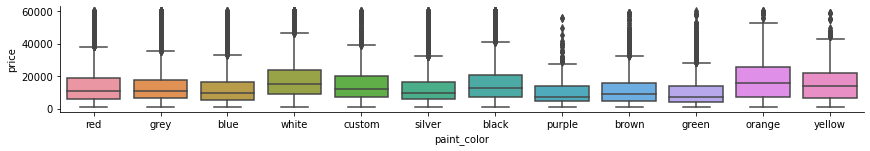

In [77]:
sns.catplot(x='paint_color', y='price', kind="box", data=df_clean, aspect = 6, height=2)     

Aparently in the data, the color of the car has no influence in the vehicle price. Drop it.

In [78]:
df_clean.drop(['paint_color'], axis =1, inplace = True)

In [79]:
df_clean.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
drive            object
type             object
description      object
state            object
dtype: object

Will work only with entires with less than 1kk of odometer.

In [81]:
(df_clean.isnull().sum() / df_clean.shape[0])*100

price            0.000000
year             0.000000
manufacturer     2.960876
model            0.654038
condition        0.000000
cylinders       32.342441
fuel             0.804025
odometer         0.000000
transmission     0.356525
drive           20.650399
type            20.450746
description      0.002951
state            0.000000
dtype: float64

Fill NaN values in the odometer column with the mean.

In [83]:
df_clean['odometer'].fillna(df_clean['odometer'].mean(), inplace = True)

In [84]:
df_clean.odometer.describe()

count     203352.000000
mean      101091.699934
std        65045.092563
min            0.000000
25%        50318.750000
50%        97000.000000
75%       141000.000000
max      1000000.000000
Name: odometer, dtype: float64

In [85]:
df_clean.cylinders.isnull().sum()

65769

Filling up cylinders NaN with the median of it.

In [88]:
df_clean.cylinders.fillna(df_clean.cylinders.median(), inplace=True)

In [89]:
(df_clean.isnull().sum() / df_clean.shape[0])*100

price            0.000000
year             0.000000
manufacturer     2.960876
model            0.654038
condition        0.000000
cylinders        0.000000
fuel             0.804025
odometer         0.000000
transmission     0.356525
drive           20.650399
type            20.450746
description      0.002951
state            0.000000
dtype: float64

Imputing nan values with "NoEspecificado"

In [91]:
df_clean.fillna({'drive':'NoEspecificado'}, inplace=True)
df_clean.fillna({'type':'NoEspecificado'}, inplace=True)

Last, drop all remaining NaN values

In [92]:
df_clean = df_clean.dropna()

In [93]:
(df_clean.isnull().sum() / df_clean.shape[0])*100

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
drive           0.0
type            0.0
description     0.0
state           0.0
dtype: float64

**Nice! no NaN values. Lets try something now**

We will check if the lenght of the description of the vehicle implies a higher price

In [95]:
df_clean['dlen'] = df_clean['description'].str.len()

Creating a new variable, named edad or age in english

In [101]:
df_clean['edad'] = 2021 - df_clean['year']

In [103]:
df_clean.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
drive            object
type             object
description      object
state            object
dlen              int64
edad            float64
dtype: object

New variable, miles per year, maybe has an influence in the price of the vehicle

In [104]:
df_clean['millas_anuales'] = df_clean['odometer'] / df_clean['edad']

In [105]:
df_clean.millas_anuales.describe()

count    193912.000000
mean      11733.218050
std        6646.873818
min           0.000000
25%        7946.792857
50%       10968.750000
75%       14529.050000
max      432258.500000
Name: millas_anuales, dtype: float64

We can make a new variable called price per mile

In [107]:
df_clean['precio_por_milla'] = df_clean['price'] / df_clean['odometer']

In [108]:
df_clean.precio_por_milla.describe()

count    1.939120e+05
mean              inf
std               NaN
min      1.600000e-03
25%      5.400286e-02
50%      1.300000e-01
75%      4.004421e-01
max               inf
Name: precio_por_milla, dtype: float64

Its too small :(

In [112]:
df_clean.shape

(193912, 17)

**Finally, final shape of the data: 193912 entries and 17 columns. Next we will visualize the data for modeling**

In [113]:
df_clean.to_csv('vehicles_clean.csv')